# PURPOSE AND OBJECTIVES
<div class="alert alert-block alert-success">


This is a basic exploratory project for data analysis with python by using a dummy dataset. 

The skills demonstrated from this project:<br>
<ul>
    <li>data loading<br>
    <li>data wrangling<br>
    <li>exploratory data analysis<br>
    <li>data model development<br>
    <li>data model evluation <br><br>

</ul>
By the end of this journey, I optained a good idea of the topic, and also be able to predit car price based on attributes such as engine-size.<br> 
Details about the dummy data base: it is a csv file for statisitic of different brand of cars and all the attribute (pricing, number of doors, etc.)

</div>




## Section 1: Data Loading
<div class="alert alert-block alert-info">
<b>what I did:</b><br>
Prepare data using pandas library<br>
Cleaning the data: drop rows with missing values<br> 
Exploring basic insight of the dataset<br> 
</div>


In [83]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

In [10]:
#testing on reading file from logal machine
df_test=pd.read_csv(r'F:\1 art\hard skills\1_computer science\data\python for data\lab\1\auto.csv')
df_test.head(10)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [12]:
#in this project I imported file from an online source instead
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
#Path can also be from local file address, dose not nessasorily to be an URL

In [13]:
df_car = pd.read_csv(path, header=None)

In [14]:
df_car.head(1)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [15]:
#Check the last rows of the dataframe
df_car.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [16]:
#because the raw data does not have column headings, in this case we have to manually add the headings
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df_car.columns=headers
df_car.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [17]:
#replace the "?" symbol with NaN so the dropna() function can remove the missing values only for price:
df1 = df_car.replace('?',np.NaN)
df1.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [18]:
#there are missing values in the price column in the original file, so i droped them, axis 0 is for droping the rows, if need drop the column change 0 to 1 
df_car_dropmissing =df1.dropna(subset=["price"],axis=0)
df_car_dropmissing.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
pwd

'C:\\Users\\weiwei'

In [20]:
#pwd is too check my current directory
#after checking the location of the saving file, I use the below command to save the cleaned file. 
#For index, I put it to false because if it is true by default it will generate row numbers
df_car_dropmissing.to_csv("automobile.csv", index=False)


<b>Exploring basics for this dataset for essential insights to help me better understand the data.</b>

In [21]:
#The main types stored in Pandas dataframes are object, float, int, bool and datetime64. 
#I use the below command to explore all the data type for each column

In [22]:
df_car_dropmissing.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [23]:
#getting a statistical summary of each column, for example, column mean value, column standard deviation, etc.
df_car_dropmissing.describe(include = "all")
# std is the standard deviation, min is the minimum value, max is the maximum value, 
#25% percentile (25% of all the alue is lower than this value), 50% oercentile (50% of all the value is higher than this value) etc

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164,201,201,201,199,201,201,201,201.000000,...,201.000000,201,197,197,201.000000,199,199,201.000000,201.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,58,22,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,181,165,113,94,118,198,NaN,...,NaN,92,23,19,NaN,19,36,NaN,NaN,2
mean,0.840796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,NaN,NaN,10.164279,NaN,NaN,25.179104,30.686567,NaN
std,1.254802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,NaN,NaN,4.004965,NaN,NaN,6.423220,6.815150,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [24]:
#in this case I am only interested in 'length' and 'compression-ratio' column
df_car_dropmissing[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,201.000000,201.000000
mean,174.200995,10.164279
std,12.322175,4.004965
min,141.100000,7.000000
25%,166.800000,8.600000
50%,173.200000,9.000000
75%,183.500000,9.400000
max,208.100000,23.000000


In [25]:
#look into some other details of the dataset such as Non-Null Count
df_car_dropmissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

## Section 2: Data Wrangling
<div class="alert alert-block alert-info">
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.<br>
<br>
<b>what I did:</b><br>
Handle missing values<br>
Correct data format<br>
Standardize and normalize data<br> 
</div>

In [26]:
#display the missing data using isnull or notnull function
missing_data = df_car_dropmissing.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
#count missing values in each column, where tolist is converting columns to list
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


<b>After close examination, I decided to replace the missing values with below stradgies:</b>

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


In [28]:
#calculate the mean value for the "normalized-losses" column
avg_norm_loss = df_car_dropmissing["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [ ]:
#Replace "NaN" with mean value in "normalized-losses" column
df_car_dropmissing["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [30]:
#Calculate the mean value for the "bore" column
avg_bore=df_car_dropmissing['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.330710659898477


In [ ]:
#Replace "NaN" with the mean value in the "bore" column
df_car_dropmissing["bore"].replace(np.nan, avg_bore, inplace=True)

In [32]:
#Calculate the mean vaule for "stroke" column
avg_stroke = df_car_dropmissing["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)


Average of stroke: 3.256903553299492


In [ ]:
# replace NaN by mean value in "stroke" column
df_car_dropmissing["stroke"].replace(np.nan, avg_stroke, inplace = True)

In [34]:
#Calculate the mean value for the "horsepower" column
avg_horsepower = df_car_dropmissing['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 103.39698492462311


In [ ]:
#Replace "NaN" with the mean value in the "horsepower" column
df_car_dropmissing['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [36]:
#Calculate the mean value for "peak-rpm" column
avg_peakrpm=df_car_dropmissing['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5117.587939698493


In [ ]:
#Replace "NaN" with the mean value in the "peak-rpm" column
df_car_dropmissing['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [38]:
#check the most common number for number of doors column
df_car_dropmissing['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent 
df_car_dropmissing["num-of-doors"].replace(np.nan, "four", inplace=True)

In [ ]:
#drop all rows that do not have price data

# drop whole row with NaN in "price" column
df_car_dropmissing.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df_car_dropmissing.reset_index(drop=True, inplace=True)

In [41]:
#read the table again to see the result
df_car_dropmissing.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


<b>Correct data format</b>

<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, the below command is use for it:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

In [43]:
df_car_dropmissing.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [ ]:
#Convert data types to proper format
df_car_dropmissing[["bore", "stroke"]].astype("float")
df_car_dropmissing[["normalized-losses"]].astype("int")
df_car_dropmissing[["price"]].astype("float")
df_car_dropmissing[["peak-rpm"]].astype("float")

In [51]:
df_car_dropmissing.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
#saving the data and reload it to make sure the already saved change is optained
df_car_dropmissing.to_csv("automobile_cleaned.csv", index=False)

In [60]:
#loading the new file again for standardization and normalization
df_sn=pd.read_csv(r'F:\1 art\hard skills\1_computer science\data\python for data\lab\1\automobile_cleaned.csv')

Now I obtained the cleaned dataset with no missing values with all data in its proper format. the next step is data standardization.

<b>Data Standardization</b>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In this dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>I will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>

<p>The formula for unit conversion is:<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>

In [61]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df_sn['city-L/100km'] = 235/df_sn["city-mpg"]

# check your transformed data 
df_sn.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [ ]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df_sn["highway-mpg"] = 235/df_sn["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df_sn.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

In [73]:
# check your transformed data 
df_sn.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


<b>Data Normalization</b>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, I want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [74]:
# replace (original value) by (original value)/(maximum value)
df_sn['length'] = df_sn['length']/df_sn['length'].max()
df_sn['width'] = df_sn['width']/df_sn['width'].max()

In [76]:
df_sn['height'] = df_sn['height']/df_sn['height'].max() 
# show the scaled columns
df_sn[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<b>Binning</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if I only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)?  </p>

<p>I will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>

In [77]:
#Convert data to correct format:
df_sn["horsepower"]=df_sn["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

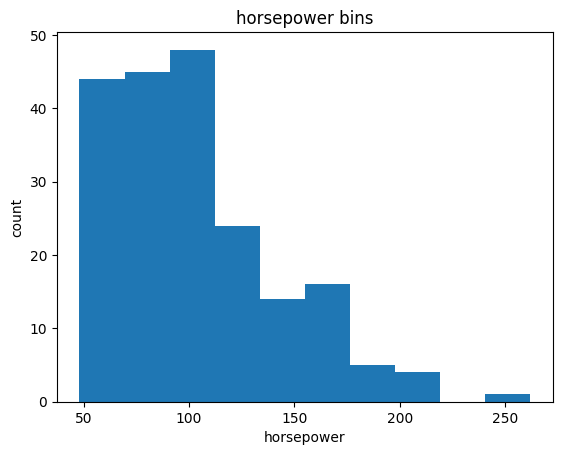

In [82]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

#plot the histogram of horsepower to see what the distribution of horsepower looks like.
plt.pyplot.hist(df_sn["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>I would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since I want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since I want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since I are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [86]:
bins = np.linspace(min(df_sn["horsepower"]), max(df_sn["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [87]:
group_names = ['Low', 'Medium', 'High']

In [88]:
df_sn['horsepower-binned'] = pd.cut(df_sn['horsepower'], bins, labels=group_names, include_lowest=True )
df_sn[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [90]:
#the number of vehicles in each bin:
df_sn["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

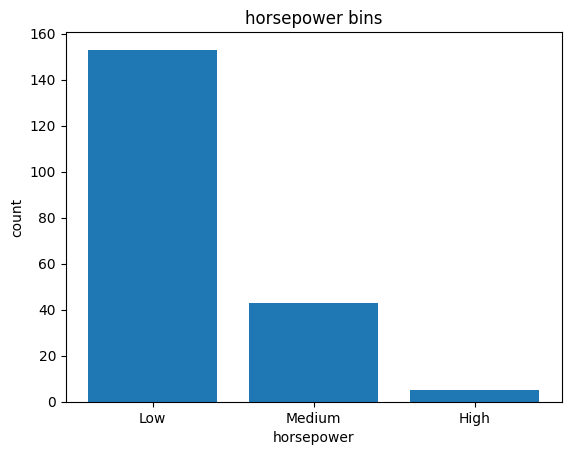

In [96]:
#plot the distribution of each bin
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names,df_sn["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High").

We successfully narrowed down the intervals from 59 to 3!

<b>Bins Visualization</b>
Normally, a histogram is used to visualize the distribution of bins we created above. 
The plot below shows the binning result for the attribute "horsepower".

Text(0.5, 1.0, 'horsepower bins')

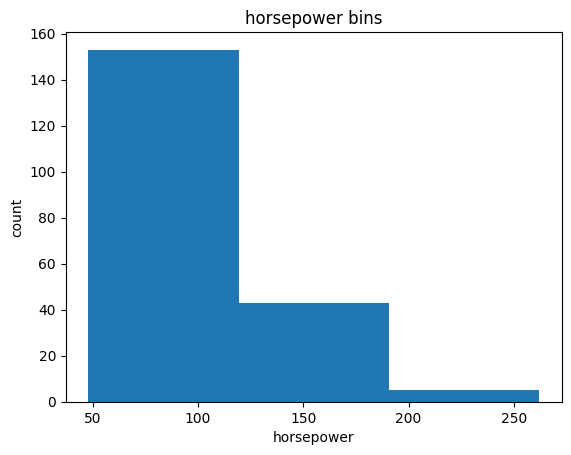

In [100]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df_sn["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<b>Indicator Variable (or Dummy Variable)</b>

<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>

<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [102]:
df_sn.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [104]:
#Get the indicator variables and assign it to data frame "dummy_variable_1":
dummy_variable_1 = pd.get_dummies(df_sn["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [106]:
#Change the column names for clarity:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [107]:
#In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now

In [108]:
# merge data frame "df" and "dummy_variable_1" 
df_sn2 = pd.concat([df_sn, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df_sn2.drop("fuel-type", axis = 1, inplace=True)

In [112]:
df_sn2.tail(20)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
181,2,94,volkswagen,std,four,sedan,fwd,front,97.3,0.825084,...,9.0,85,5250.0,27,6.911765,8195.0,8.703704,Low,0,1
182,2,94,volkswagen,std,four,sedan,fwd,front,97.3,0.825084,...,9.0,85,5250.0,27,6.911765,8495.0,8.703704,Low,0,1
183,2,94,volkswagen,turbo,four,sedan,fwd,front,97.3,0.825084,...,23.0,68,4500.0,37,5.595238,9495.0,6.351351,Low,1,0
184,2,94,volkswagen,std,four,sedan,fwd,front,97.3,0.825084,...,10.0,100,5500.0,26,7.343750,9995.0,9.038462,Low,0,1
185,3,122,volkswagen,std,two,convertible,fwd,front,94.5,0.765497,...,8.5,90,5500.0,24,8.103448,11595.0,9.791667,Low,0,1
186,3,256,volkswagen,std,two,hatchback,fwd,front,94.5,0.796252,...,8.5,90,5500.0,24,8.103448,9980.0,9.791667,Low,0,1
187,0,122,volkswagen,std,four,sedan,fwd,front,100.4,0.865930,...,8.5,110,5500.0,19,9.791667,13295.0,12.368421,Low,0,1
188,0,122,volkswagen,turbo,four,sedan,fwd,front,100.4,0.865930,...,23.0,68,4500.0,33,6.184211,13845.0,7.121212,Low,1,0
189,0,122,volkswagen,std,four,wagon,fwd,front,100.4,0.879865,...,9.0,88,5500.0,25,7.580645,12290.0,9.400000,Low,0,1
190,-2,103,volvo,std,four,sedan,rwd,front,104.3,0.907256,...,9.5,114,5400.0,23,8.392857,12940.0,10.217391,Low,0,1


In [113]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df_sn['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [117]:
# merge the new dataframe to the original datafram
df_sn3 = pd.concat([df_sn2, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df_sn3.drop('aspiration', axis = 1, inplace=True)

df_sn3.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


In [118]:
#save the final verion of the cleaned data
df_sn3.to_csv('auto_cleaned_df_final.csv')